In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('USImport.csv', delimiter=';')
df.head()

,Date,Import Country (Source),Exporter,Importer,HS Code,Country of Origin,Country of Destination,Quantity,Qty Unit,Weight,Wgt Unit,Value (US$),Transport Mode,Products
0,2025-02-28 00:00:00,USA,SUMEC MACHINERY ELECTRIC CO LTD,FIRMAN POWER EQUIPMENT INCORPORATED,851390,CHINA,UNITED STATES,192,PKG,19680,KG,"515637,13",MARITIME,GENERATOR
1,2025-02-28 00:00:00,USA,GUANGZHOU HUIKANG ELECTRONIC TECHNO LOGY CO LTD,CHAI VISION IMPORT LLC,851390,CHINA,UNITED STATES,215,CTN,2506,KG,"65659,89",MARITIME,SAUNA
2,2025-02-27 00:00:00,USA,XUZHOU HEALTHLAND SAUNA EQUIPMENT C WEST OF XUPEI,CHAI VISION IMPORT NJ INC,851390,CHINA,UNITED STATES,57,CTN,3724,KG,"97572,8",MARITIME,SAUNA
3,2025-02-26 00:00:00,USA,ZHEJIANG CAFTP SERVICE CO LTD,AYESPRO LLC,851390,CHINA,UNITED STATES,1049,CTN,9110,KG,"238691,78",MARITIME,LIGHTS
4,2025-02-26 00:00:00,USA,ZHEJIANG TIANZHIXIN SPORTS EQUIPMEN T CO LTD,CHAI VISION IMPORT LLC,851390,CHINA,UNITED STATES,400,CTN,3200,KG,"83843,44",MARITIME,SAUNA


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6185 entries, 0 to 6184
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Date                     6185 non-null   object
 1   Import Country (Source)  6185 non-null   object
 2   Exporter                 3658 non-null   object
 3   Importer                 6185 non-null   object
 4   HS Code                  6185 non-null   int64 
 5   Country of Origin        6185 non-null   object
 6   Country of Destination   6185 non-null   object
 7   Quantity                 6185 non-null   object
 8   Qty Unit                 6185 non-null   object
 9   Weight                   6185 non-null   object
 10  Wgt Unit                 6185 non-null   object
 11  Value (US$)              6185 non-null   object
 12  Transport Mode           6185 non-null   object
 13  Products                 6185 non-null   object
dtypes: int64(1), object(13)
memory usage: 67

In [10]:
# chuẩn hóa dữ liệu dạng số (Quantity, Weight, Value (US$))
df['Quantity'] = df['Quantity'].str.replace(',', '.').astype(float)
print(df['Quantity'].head())

0     192.0
1     215.0
2      57.0
3    1049.0
4     400.0
Name: Quantity, dtype: float64


In [ ]:
df['Weight'] = df['Weight'].str.replace(',', '.').astype(float)
df['Value (US$)'] = df['Value (US$)'].str.replace(',', '.').astype(float)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6185 entries, 0 to 6184
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     6185 non-null   object 
 1   Import Country (Source)  6185 non-null   object 
 2   Exporter                 3658 non-null   object 
 3   Importer                 6185 non-null   object 
 4   HS Code                  6185 non-null   int64  
 5   Country of Origin        6185 non-null   object 
 6   Country of Destination   6185 non-null   object 
 7   Quantity                 6185 non-null   float64
 8   Qty Unit                 6185 non-null   object 
 9   Weight                   6185 non-null   float64
 10  Wgt Unit                 6185 non-null   object 
 11  Value (US$)              6185 non-null   float64
 12  Transport Mode           6185 non-null   object 
 13  Products                 6185 non-null   object 
dtypes: float64(3), int64(1),

In [14]:
df.describe()

,HS Code,Quantity,Weight,Value (US$)
count,6.185000e+03,6185.000000,6185.000000,6.185000e+03
mean,1.385053e+08,635.528912,14102.567683,1.755716e+05
std,1.082576e+10,1204.656437,26173.165892,4.960320e+05
min,8.513900e+05,1.000000,1.000000,0.000000e+00
25%,8.513900e+05,16.000000,2771.000000,0.000000e+00
50%,8.513900e+05,44.000000,8000.000000,0.000000e+00
75%,8.513900e+05,759.000000,10824.000000,1.082104e+05
max,8.513900e+11,9296.000000,255559.000000,4.450822e+06


In [16]:
print(df['Quantity'].mean())
print(df['Quantity'].median())

635.5289118835893
44.0


In [17]:
print(df['Weight'].mean())
print(df['Weight'].median())

14102.567683104284
8000.0


In [18]:
print(df['Value (US$)'].mean())
print(df['Value (US$)'].median())

175571.63005681484
0.0


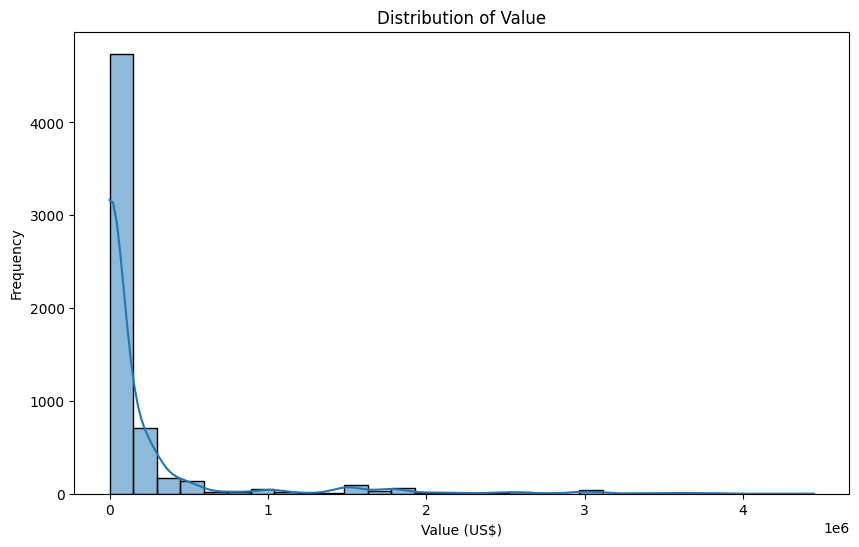

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Value (US$)'], bins=30, kde=True)
plt.xlabel('Value (US$)')
plt.ylabel('Frequency')
plt.title('Distribution of Value')
plt.show()

In [19]:
mean_quantity = df['Quantity'].mean()
median_quantity = df['Quantity'].median()
diff_percent = (mean_quantity - median_quantity) / mean_quantity * 100
print(f"Difference between mean and median of Quantity: {diff_percent:.2f}%")

Difference between mean and median of Quantity: 93.08%


In [28]:
print(df['Weight'].std())
print(df['Quantity'].std())
print(df['Value (US$)'].std())

26173.165892348046
1204.656437223324
496032.01052449265


In [32]:
import numpy as np
quantiles_ranges = [0, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 1]
quantiles = df['Quantity'].quantile(quantiles_ranges)
print("Quantiles of Quantity:")
for q in quantiles_ranges:
    print(f"{q*100:5.1f}%: {quantiles[q]}")

Quantiles of Quantity:
  0.0%: 1.0
 10.0%: 3.0
 20.0%: 10.0
 25.0%: 16.0
 30.0%: 23.0
 40.0%: 40.0
 50.0%: 44.0
 60.0%: 44.0
 70.0%: 426.59999999999854
 75.0%: 759.0
 80.0%: 975.8000000000029
 90.0%: 2230.80000000001
100.0%: 9296.0


In [33]:
q1 = df['Value (US$)'].quantile(0.25)
q3 = df['Value (US$)'].quantile(0.75)
iqr = q3 - q1
print(f"Interquartile Range (IQR) of Value (US$): {iqr}")

Interquartile Range (IQR) of Value (US$): 108210.43


In [ ]:
X = 5049000
mean_value = df['Value (US$)'].mean()
std_value = df['Value (US$)'].std()
z_score_x = (X - mean_value) / std_value
print(f"Z-score of {X} in Value (US$): {z_score_x:.2f}")

Z-score of 5049000 in Value (US$): 9.82


In [43]:
mode_transport = df['Transport Mode'].mode()
print(f"Most common transport mode: {mode_transport[0]}")

mode_product = df['Products'].mode()
print(f"Most common product: {mode_product[0]}")

Most common transport mode: MARITIME
Most common product: COMPUTER
